# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 Classification with nearest neighbors

In [3]:
import pandas as pd
# read in the data
dataTrain = pd.read_csv('OccupancyTrain.csv',header=None)
dataTest = pd.read_csv('OccupancyTest.csv',header=None)
# split input variables and labels
XTrain = dataTrain.iloc[:,:-1].values # use all rows and all but the last column
YTrain = dataTrain.iloc[:,-1].values # use all rows , only the last column
XTest = dataTest.iloc[:,:-1].values
YTest = dataTest.iloc[:,-1].values

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)  # K-Nearest Neighbor Classifier, n=1
knn.fit(XTrain, YTrain)  # Classification

KNeighborsClassifier(n_neighbors=1)

In [5]:
from sklearn.metrics import accuracy_score
# givenclassifier called knn , compute the accuracy on the testset
accTrain = accuracy_score(YTrain,knn.predict(XTrain))
accTest = accuracy_score(YTest,knn.predict(XTest))
print("accuracy score of prediction on Training data is "+str(accTrain))
print("accuracy score of prediction on Test data is "+str(accTest))

accuracy score of prediction on Training data is 1.0
accuracy score of prediction on Test data is 0.9775


<font face='Calibri'><font size=3>The result when k=1: </br>100% accuracy of prediction on Training data makes sense because it used Training data to train. And the accuracy of prediction on Test data is very high (97.75%), which means the model is good. If the accuracy of prediction on Test data is low, the model may be overfitting. </font>

### Exercise 2 Hyperparameter selection using cross-validation

In [6]:
from sklearn.model_selection import KFold

In [7]:
def find_best_k(k_list,XTrain,XTest,YTrain,YTest):
    k_loss = []
    for k in k_list:
        
        loss_list = []
        cv = KFold (n_splits = 5)
        for train, test in cv.split(XTrain):
            XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train], XTrain[test], YTrain[train], YTrain[test]

            knn = KNeighborsClassifier(n_neighbors=k) # K-Nearest Neighbor Classifier, n=1
            knn.fit(XTrainCV, YTrainCV)  # Training
            # calculate error and loss
            error = (YTestCV - knn.predict(XTestCV))**2
            loss = sum(error)/len(error) 
            loss_list.append(loss)
         
        loss = np.mean(loss_list)
        k_loss.append(loss)
        print("Loss for "+ str(k) + " neighbors: " + str(loss))
    ind = k_loss.index(min(k_loss))
    best_k = k_list[ind]
    print("Best k: " + str(best_k))
    return best_k,k_loss

In [8]:
k_list = [1,3,5,7,9,11]
find_best_k(k_list,XTrain=XTrain,XTest=XTest,YTrain=YTrain,YTest=YTest)

Loss for 1 neighbors: 0.018333333333333333
Loss for 3 neighbors: 0.008333333333333333
Loss for 5 neighbors: 0.008333333333333333
Loss for 7 neighbors: 0.008333333333333333
Loss for 9 neighbors: 0.008333333333333333
Loss for 11 neighbors: 0.009999999999999998
Best k: 3


(3,
 [0.018333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.009999999999999998])

Loss for 1 neighbors: 0.018333333333333333
Loss for 3 neighbors: 0.008333333333333333
Loss for 5 neighbors: 0.008333333333333333
Loss for 7 neighbors: 0.008333333333333333
Loss for 9 neighbors: 0.008333333333333333
Loss for 11 neighbors: 0.009999999999999998
Best k: 3


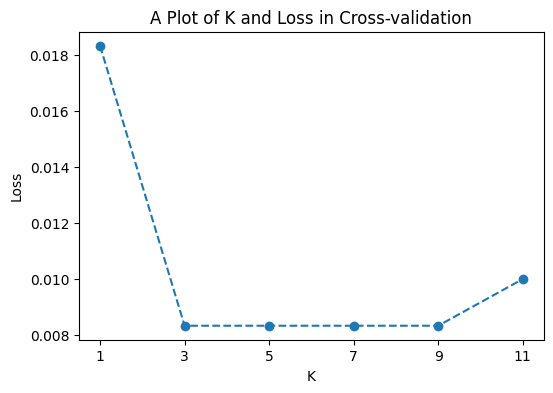

In [9]:
k_loss = find_best_k(k_list,XTrain=XTrain,XTest=XTest,YTrain=YTrain,YTest=YTest)[1]
plt.figure(figsize=(6,4),facecolor='w')
plt.plot(k_list, k_loss,'o--')
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('A Plot of K and Loss in Cross-validation')

plt.xticks(k_list)
plt.show()

<font face='Calibri'><font size=3>The process: the training data is divided into 5 folds, 4 folds for training and 1 fold for testing (in turns). Then the k=[1,3,5,7,9,11] is put into the fiting model, and get the "loss" - the differences between the prediction and the true value. At last, the k is chosen with minimum average "loss". </br>The best k is 3. According to the plot, the losses decrease and then increase with the increasing of the k in the range [1,3,5,7,9,11]. When k=3, it meets the minimum at the first time.</font>

### Exercise 3 Evaluation of classification performance

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)  # K-Nearest Neighbor Classifier, n=3
knn.fit(XTrain, YTrain)  # Classification

KNeighborsClassifier(n_neighbors=3)

In [11]:
from sklearn.metrics import accuracy_score
# givenclassifier called knn , compute the accuracy on the testset
accTrain = accuracy_score(YTrain,knn.predict(XTrain))
accTest = accuracy_score(YTest,knn.predict(XTest))
print("accuracy score of prediction on Training data is "+str(accTrain))
print("accuracy score of prediction on Test data is "+str(accTest))

accuracy score of prediction on Training data is 0.9933333333333333
accuracy score of prediction on Test data is 0.9875


<font face='Calibri'><font size=3>The result when k=3:</br>The accuracy of prediction on Training data is 99.33%, while the accuracy of prediction on Test data is 98.75%, which means the model is good. </font>

### Exercise 4 Data normalization

In [12]:
from sklearn import preprocessing
#version 1
scaler = preprocessing.StandardScaler().fit(XTrain)
XTrainN =scaler.transform(XTrain)
XTestN = scaler.transform(XTest)

In [13]:
k_list = [1,3,5,7,9,11]
find_best_k(k_list,XTrain=XTrainN,XTest=XTestN,YTrain=YTrain,YTest=YTest)

Loss for 1 neighbors: 0.01666666666666667
Loss for 3 neighbors: 0.008333333333333333
Loss for 5 neighbors: 0.008333333333333333
Loss for 7 neighbors: 0.008333333333333333
Loss for 9 neighbors: 0.009999999999999998
Loss for 11 neighbors: 0.008333333333333333
Best k: 3


(3,
 [0.01666666666666667,
  0.008333333333333333,
  0.008333333333333333,
  0.008333333333333333,
  0.009999999999999998,
  0.008333333333333333])

Loss for 1 neighbors: 0.01666666666666667
Loss for 3 neighbors: 0.008333333333333333
Loss for 5 neighbors: 0.008333333333333333
Loss for 7 neighbors: 0.008333333333333333
Loss for 9 neighbors: 0.009999999999999998
Loss for 11 neighbors: 0.008333333333333333
Best k: 3


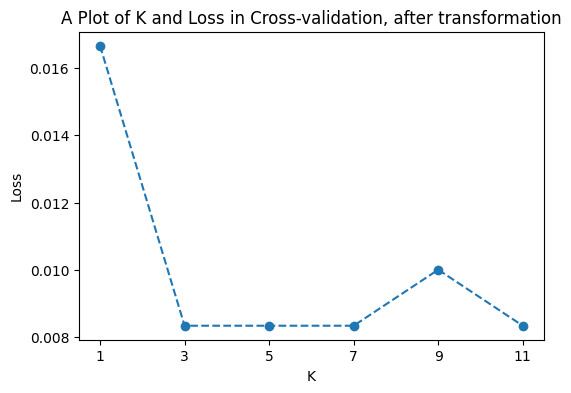

In [14]:
k_loss = find_best_k(k_list,XTrain=XTrainN,XTest=XTestN,YTrain=YTrain,YTest=YTest)[1]
plt.figure(figsize=(6,4),facecolor='w')
plt.plot(k_list, k_loss,'o--')
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('A Plot of K and Loss in Cross-validation, after transformation')

plt.xticks(k_list)
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)  # K-Nearest Neighbor Classifier, n=3
knn.fit(XTrainN, YTrain)  # Classification

KNeighborsClassifier(n_neighbors=3)

In [16]:
from sklearn.metrics import accuracy_score
# givenclassifier called knn , compute the accuracy on the testset
accTrainN = accuracy_score(YTrain,knn.predict(XTrainN))
accTestN = accuracy_score(YTest,knn.predict(XTestN))
print("accuracy score of Training data is "+str(accTrainN))
print("accuracy score of Test data is "+str(accTestN))

accuracy score of Training data is 0.9933333333333333
accuracy score of Test data is 0.9875


<font face='Calibri'><font size=3>The version 1 is correct. Because the information of testing data can not be used until testing.
<br/>Version 1: transform both training and testing data with training data. <br/>Version 2: transform training data with training data and transform testing data with testing data. <br/>Version 3: combine the training and the testing data as total data, and transform traning and testing data with total data.<br/> <br/>The best k found in cross-validation is 3, too. The accuracy of prediction on Training data is 99.33%, while the accuracy of prediction on Test data is 98.75%. The new model is the same good as the old one in accuracy. But the decreasing of losses could be observed at k=1 and k=11, which is probably due to the weaker effect of outliers after transformation. In addition, the transformed data has no unit, making it more comparable.</font>

<font face='Calibri'><font size=3> </font>